In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [2]:
print("Shape:", df.shape)
print(df.info())
print(df.describe())


Shape: (5000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
None
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                  

In [3]:
# Loop example: Count houses above average price
avg_price = df['Price'].mean()

count = 0
for price in df['Price']:
    if price > avg_price:
        count += 1

print("Houses above average price:", count)


Houses above average price: 2503


In [4]:
price_array = np.array(df['Price'])

print("Mean:", np.mean(price_array))
print("Median:", np.median(price_array))
print("Std Dev:", np.std(price_array))


Mean: 1232072.654142357
Median: 1232669.3779657914
Std Dev: 353082.3130526381


In [5]:
df.isnull().sum()


,0
Avg. Area Income,0
Avg. Area House Age,0
Avg. Area Number of Rooms,0
Avg. Area Number of Bedrooms,0
Area Population,0
Price,0
Address,0


In [6]:
df = df.drop_duplicates()


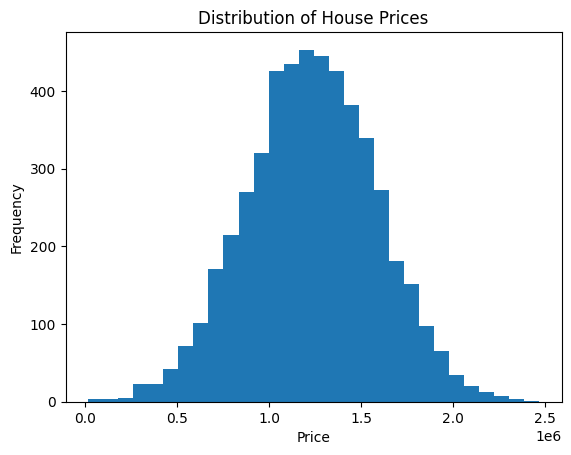

In [7]:
plt.figure()
plt.hist(df['Price'], bins=30)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


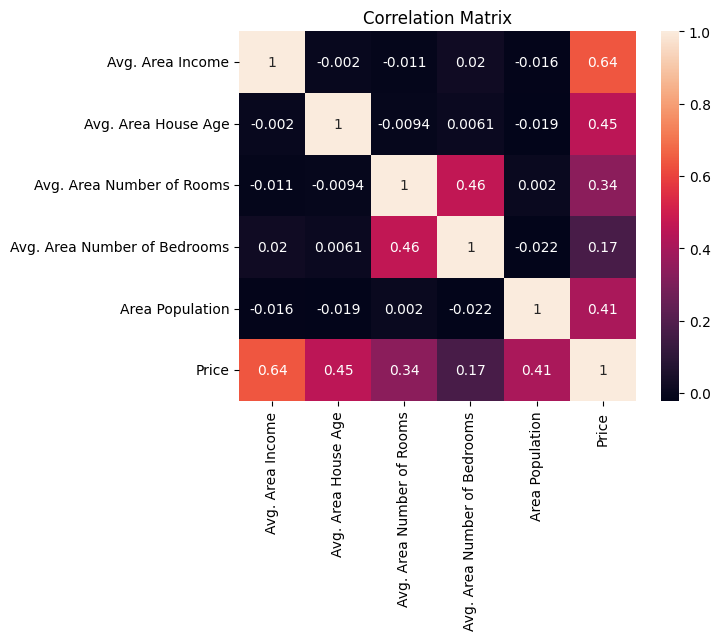

In [10]:
df = df.drop('Address', axis=1)

plt.figure()
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()


In [11]:
print("Mean Price:", df['Price'].mean())
print("Median Price:", df['Price'].median())
print("Mode:", df['Price'].mode()[0])
print("Variance:", df['Price'].var())
print("Standard Deviation:", df['Price'].std())


Mean Price: 1232072.654142357
Median Price: 1232669.3779657914
Mode: 15938.657923287848
Variance: 124692058202.24152
Standard Deviation: 353117.6265810608


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_features, columns=df.columns)
scaled_df.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,1.028660,-0.296927,0.021274,0.088062,-1.317599,-0.490081
1,1.000808,0.025902,-0.255506,-0.722301,0.403999,0.775508
2,-0.684629,-0.112303,1.516243,0.930840,0.072410,-0.490211
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734,0.080843
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387,-1.702518


In [14]:
correlation = df.corr()
correlation['Price'].sort_values(ascending=False)


,Price
Price,1.000000
Avg. Area Income,0.639734
Avg. Area House Age,0.452543
Area Population,0.408556
Avg. Area Number of Rooms,0.335664
Avg. Area Number of Bedrooms,0.171071


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [16]:
df = pd.read_csv("USA_Housing.csv")

df.columns = df.columns.str.strip()
df.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [17]:
# Check null values
print(df.isnull().sum())

# Drop duplicates
df = df.drop_duplicates()

# Drop Address column (text column)
if 'Address' in df.columns:
    df = df.drop('Address', axis=1)


Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


In [18]:
print(df.describe())

print("Mean Price:", df['Price'].mean())
print("Median Price:", df['Price'].median())
print("Std Dev:", df['Price'].std())


       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.61

In [19]:
median_price = df['Price'].median()

df['High_Price'] = np.where(df['Price'] > median_price, 1, 0)

df.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,High_Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,0
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,1
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,0
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,1
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,0


In [20]:
X = df.drop(['Price', 'High_Price'], axis=1)
y = df['High_Price']


In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [23]:
model = LogisticRegression()

model.fit(X_train, y_train)


LogisticRegression()

In [24]:
y_pred = model.predict(X_test)


In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.905
Confusion Matrix:
[[435  44]
 [ 51 470]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       479
           1       0.91      0.90      0.91       521

    accuracy                           0.91      1000
   macro avg       0.90      0.91      0.90      1000
weighted avg       0.91      0.91      0.91      1000

